# Final Project Work for TC Cristobal
* Lara Tobias-Tarsh (laratt@umich.edu) and Nick Dewhirst (nickdew@umich.edu)
* Created: 16/03/2023
* Scroll to bottom half of this notebook for new work

This tutorial should cover how to use the custom data classes that I created for storing tropical cyclone (TC) track data from the Thorpex Grand Global Ensemble (TIGGE) and the HURDAT2 best track archive. This should dramatically simplify how information is stored in verification and also allows for some basic verification and comparison calculations to be done relatively simply.

### Initialising a cyclone object

The first step to using the TC custom dataframes is to import the track_error module. Think of this like a C++ .h file from 101, or like a python library. Once you import the module, you can use it like you would use a python library (e.g. numpy). 


You need to have the module in the same directory as the notebook you are working in to use it, so work in the errorCalcModules directory when you are doing analysis, or define a filepath to the module before you import it.


You need all of the imports below to do this, as they are dependecies for the cyclone module itself.

In [337]:
# perform imports
import numpy as np
import track_error as te # the name you use to import this is arbitrary, I just used te bc it is an easy shorthand

Once you have your imports, you can start to initialise your Cyclone objects. 

The only important thing here is the way your csv files are stored in their directories. You need to have each TC's csv files stored in a seperate directory so that the string parsing can work correctly. I will probably fix this at some point so that it can be done by just storing everything in one directory, but right now I can't be bothered to write the function... (sorry ANL...)


I have organised the files on the github repo the same way that I have organised the files on my laptop when I tested all the code (TBA...), so if you clone the repo exactly you should have 0 problems with this. If you want to do this from scratch, you want to change the directory structure, or you have other models you want to include, this is how I have my directories structured:


```
.../tcTracks/cycName/stormName-year-month-day-hour.csv
```

All TIGGE tracks should be stored this way because the function uses the directory name to extract the name and year of the storm. I think this is a useful and organised way to store all of the data anyway, so I doubt I will change the syntax as it stops me getting lazy with file organisation while letting me be a lazy coder :)


All you need to do to initialise a cyclone object is call the cyclone constructor, called generate_cyclone(). This takes only a filepath to a directory as an argument and does all of the work for you from there.

In [338]:
# here we initialise one cyclone
#Look at Hurricane Delta and Cristobal 
filepath = "/Users/nweat/Downloads/hurricane-verification-main/hurricane-verification-main/tcTracks/Cristobal"
cyclone = te.generate_cyclone(filepath)

# Note issues with Teddy (had to hardcode the TC identifier), Dolly, Wilfred, Omar, Eta

reading file: Cristobal-2020-06-03-00.csv
reading file: Cristobal-2020-06-03-12.csv
reading file: Cristobal-2020-06-04-00.csv
reading file: Cristobal-2020-06-04-12.csv
reading file: Cristobal-2020-06-05-00.csv
reading file: Cristobal-2020-06-05-12.csv
reading file: Cristobal-2020-06-06-00.csv
reading file: Cristobal-2020-06-06-12.csv
reading file: Cristobal-2020-06-07-00.csv
reading file: Cristobal-2020-06-07-12.csv
reading file: Cristobal-2020-06-08-00.csv
reading file: Cristobal-2020-06-08-12.csv
reading file: Cristobal-2020-06-09-00.csv
reading file: Cristobal-2020-06-09-12.csv
reading file: Cristobal-2020-06-10-00.csv
reading file: Cristobal-2020-06-10-12.csv


C:\Users\nweat\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nweat\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Acessing data in the object

The TC object is a bunch of classes thrown together to create a 'Cyclone object' which contains all of the information for each storm. It is kind of like a custom matrix or dictionary with a bunch of lists inside it. This is why just printing it looks gross.

The nice thing about this format is you can just use dot indexing to find things and means that you don't have loads of lists that you have to index logically or numerically floating around. It is therefore WAY easier to keep track of all of the data for each system.

The object has a ton of attributes and methods that can be called to perform various operations, including embedded functions. We will start with the cyclone itself. This is the main frame that contains all the other lists of data. It also lets us see some summary statistics of the storm:

Tropical Cyclone Cristobal:
formation date: 2020-06-01, 18:00
dissipation date: 2020-06-12, 06:00
Best Track: [(-90.9, 19.4), (-91.6, 19.6), (-92.1, 19.6), (-92.5, 19.5), (-92.6, 19.2), (-92.5, 19.0), (-92.3, 18.9), (-92.2, 18.8), (-92.1, 18.7), (-91.9, 18.5), (-91.7, 18.2), (-91.5, 17.9), (-91.2, 17.7), (-90.8, 17.6), (-90.4, 17.9), (-90.1, 18.6), (-89.9, 19.6), (-89.9, 20.8), (-90.0, 22.0), (-90.1, 23.0), (-90.2, 23.9), (-90.2, 24.8), (-90.1, 25.8), (-90.0, 26.9), (-89.9, 28.0), (-89.8, 29.0), (-89.8, 29.3), (-89.9, 29.8), (-90.6, 30.6), (-91.5, 31.7), (-92.0, 32.9), (-92.1, 34.2), (-92.2, 35.8), (-92.1, 38.0), (-91.7, 40.3), (-90.8, 42.6), (-89.3, 45.0), (-87.4, 47.5), (-85.1, 49.8), (-82.6, 51.7), (-81.2, 52.7), (-80.4, 53.2), (-79.8, 53.4), (-79.4, 53.3), (-79.1, 52.5)]
ECMWF Mean Total Track Error: 103.3260505822758
GFS Mean Total Track Error: nan
ECMWF Mean Total Intensity Error: 1.3234592054365073
GFS Mean Total Intensity Error: nan
Best track map for TC Cristobal: 


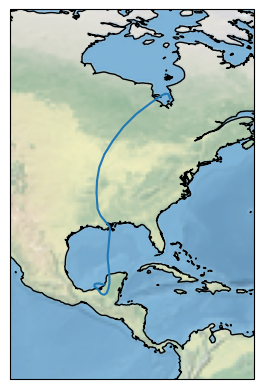

In [339]:
# See storm summary:
cyclone.print_summary()

# See storm best track:
cyclone.track_map()


The next thing you want to look at is the individual model runs. They should be ordered chronologically, so the first run in the list is the first time the model was initialised and so on. They each contain some simple error statistics for the speciific run, and the individual coordinates of the storm at each forecast hour. 

You can access these in the runs attribute of the cyclone object, and then index into them like you would any other list:

In [340]:
# Lets look at the first ECMWF run for this system:
RunNumber = 12
#Output = cyclone.ecmwf.runs[RunNumber].forecasts

#RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
#RawTE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].track_error for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
#Change the argument before "for" to access the type of data we want

This is a track object, which is just a list of datapoints about the cyclone, and the run's specific mean track error and mean intensity error. We can unpack this further to see how it works:

In [341]:
# Lets examine the summary statistics
meanTrackError = cyclone.ecmwf.runs[0].mean_terror
meanIntensityError = cyclone.ecmwf.runs[0].mean_ierror

print(f'Mean Track Error {meanTrackError}')
print(f'Mean Intensity Error: {meanIntensityError}')

# Now we look at the positions themselves. We break these down like so:
cyclone.ecmwf.runs[0].forecasts[0]

Mean Track Error 129.13353335446013
Mean Intensity Error: 2.4761904761904763


Forecast(time=Timestamp('2020-06-03 00:00:00'), lat=18.9, lon=-92.3, mslp=1000, vmax=32, track_error=23.791989907819147, intensity_error=4)

Here we have a position from the TIGGE archive for the system at a specific time. We can use . indexing to access all of these statistics individually as well if we want to. If you change this . index to either time, lat, lon, mslp, vmax, track_error or intensity_error you will be able to directly access this datum. 

Try changing it in the cell below to make sure it works.

In [342]:
#cyclone.ecmwf.runs[0].forecasts[0].track_error

In [343]:
import matplotlib as mpl
def merge(list1, list2):
    '''Creates a condensed list of tuples from separate lists of data'''
    merged_list = tuple(zip(list1, list2))
    return merged_list

def colorFader(c1,c2,mix=0):
    """ Fades two matplotlib colors together into a gradient """
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

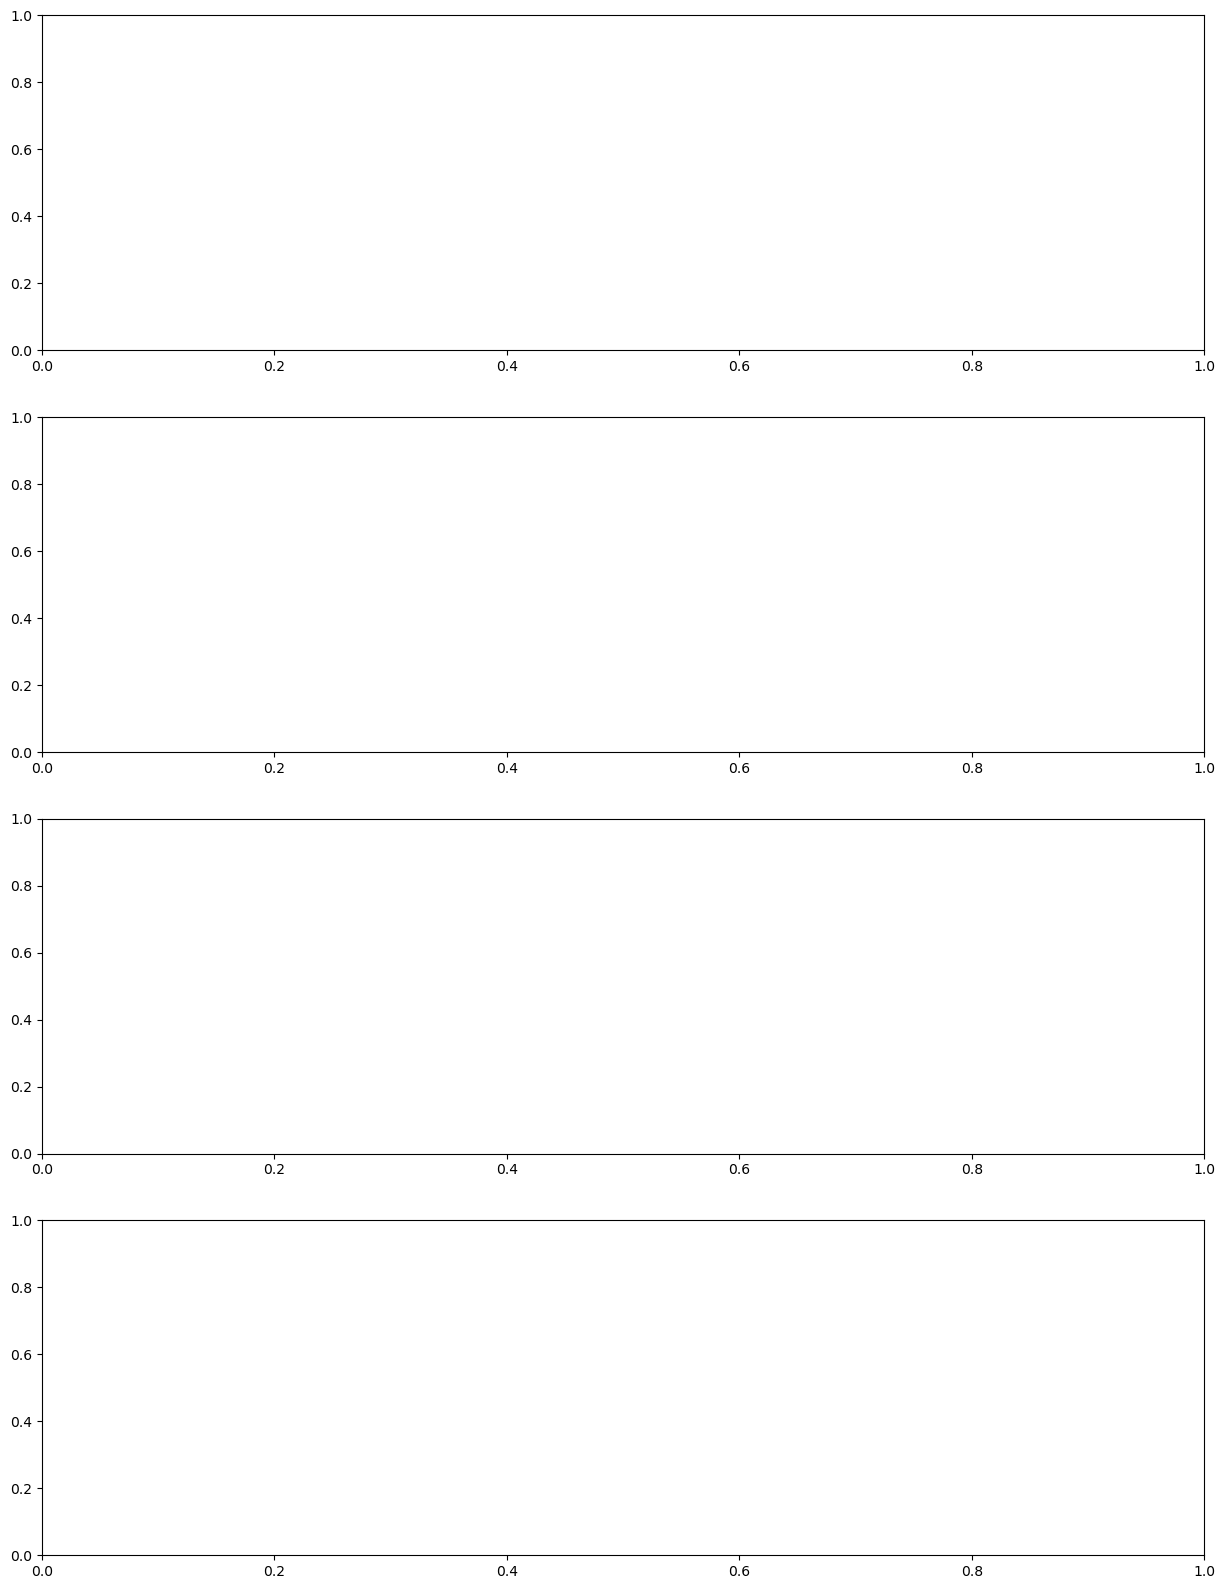

In [348]:
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import timedelta
from scipy.fft import fft, fftfreq
from scipy.ndimage import uniform_filter1d

def fftplot(RunNumber, ax1, ax2, ax3, ax4, cf):
    '''Creates a figure with 3 subplots for actual track error against time, 
    a second degree polynomial fit of the track error against lead time from model initialization, 
    and fast Fourier transforms of the track error data for each model run'''

    #All the model output variables in a big list of tuples.
    Output = cyclone.ecmwf.runs[RunNumber].forecasts

    #Get the times and track errors out of the list.
    RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    RawTE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].track_error for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    
    #Create a list of tuples with the times and track errors.
    TimeandTrackError = merge(RawT, RawTE)
    
    #Sort the tuples in chronological order to plot them correctly.
    SortedTTE = sorted(TimeandTrackError, key = lambda x: x[0])
    
    #Empty lists to append the times and track errors into from the list of tuples.
    TimeList = []
    TrackErrorList = []
    for i in SortedTTE:
        TimeList.append(i[0])
        TrackErrorList.append(i[1])
    
    #Convert the new lists into arrays.
    Time = np.array(TimeList)
    TrackError = np.array(TrackErrorList)
    
    #Create a range of times in a non-datetime format and calculate the polynomial coeffieicents so polyfit can work.
    PolyfitTime = range(len(Time))
    coeffs = np.polyfit(PolyfitTime, TrackError, 2)

    #Create the polynomial fit.
    Trendline = np.polyval(coeffs, PolyfitTime)

    dt = 1/4 #Units of fraction of a day for fftfreq.
    N = Time.size #Length of time series.
    
    #Detrended the data buy subtracting the trendlines from track errors and take the Fourier transform of that. 
    TrackErrorfft = fft(TrackError-Trendline)

    #Get the frequencies in cycles/year.
    Freqs = fftfreq(N, dt)
    
    #Get the amplitudes.
    TrackErrorAmps = 1/N * np.abs(TrackErrorfft[1:N//2])
    
    ### MAY IMPLEMENT FOURIER MEAN LATER IF I CAN FIGURE IT OUT ###
    #Create a simple signal
    #Find the daily running mean.
    #RunningFourierMean = uniform_filter1d(TrackErrorAmps, 4)
    
    #For the labels of each subplot so we can compare each model run based on initialization time.
    InitTime = TimeList[0]

    #First set of axes for track error vs. time on first subplot.
    ax1.plot(Time, TrackError, label = InitTime, c = colorFader('red', 'blue', cf))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Track Error (km)')
    ax1.set_title('Track Error for each EPS Mean Run of TC Cristobal')
    
    #Second set of axes for the polynomial fits vs. time.
    ax2.plot(range(len(Time)), Trendline, label = InitTime, c = colorFader('red', 'blue', cf))
    ax2.set_xlabel('Lead Time from Initialization')
    ax2.set_ylabel('Track Error (km)')
    ax2.set_title('Second Degree Polynomial Fits for each EPS Mean Run of TC Cristobal')
    
    ax3.plot(Time, TrackError - Trendline, label = InitTime, c = colorFader('red', 'blue', cf))
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Detrended Track Error (km)')
    ax3.set_title('Detrended Track Error Data for each EPS Mean Run of TC Cristobal')
    
    #Third set of axes for the fourier transforms and frequencies.
    ax4.plot(Freqs[1:N//2], TrackErrorAmps, label = InitTime, c = colorFader('red', 'blue', cf))
    #ax4.plot(Freqs[1:N//2], RunningFourierMean, label = 'Mean of Fourier Transform Amplitudes', c = 'k', lw = 3)
    ax4.set_xlabel('Frequency (cycles/day)')
    ax4.set_ylabel('Amplitude (km)')
    ax4.set_title('Frequency Spectra for Detrended Track Errors of each EPS Mean Run for TC Cristobal')
    
    return InitTime     

#Create the figure for the subplots and set positions for the axes.
fig1 = plt.figure(figsize=(15,20))
ax1 = fig1.add_subplot(411)
ax2 = fig1.add_subplot(412)
ax3 = fig1.add_subplot(413)
ax4 = fig1.add_subplot(414)

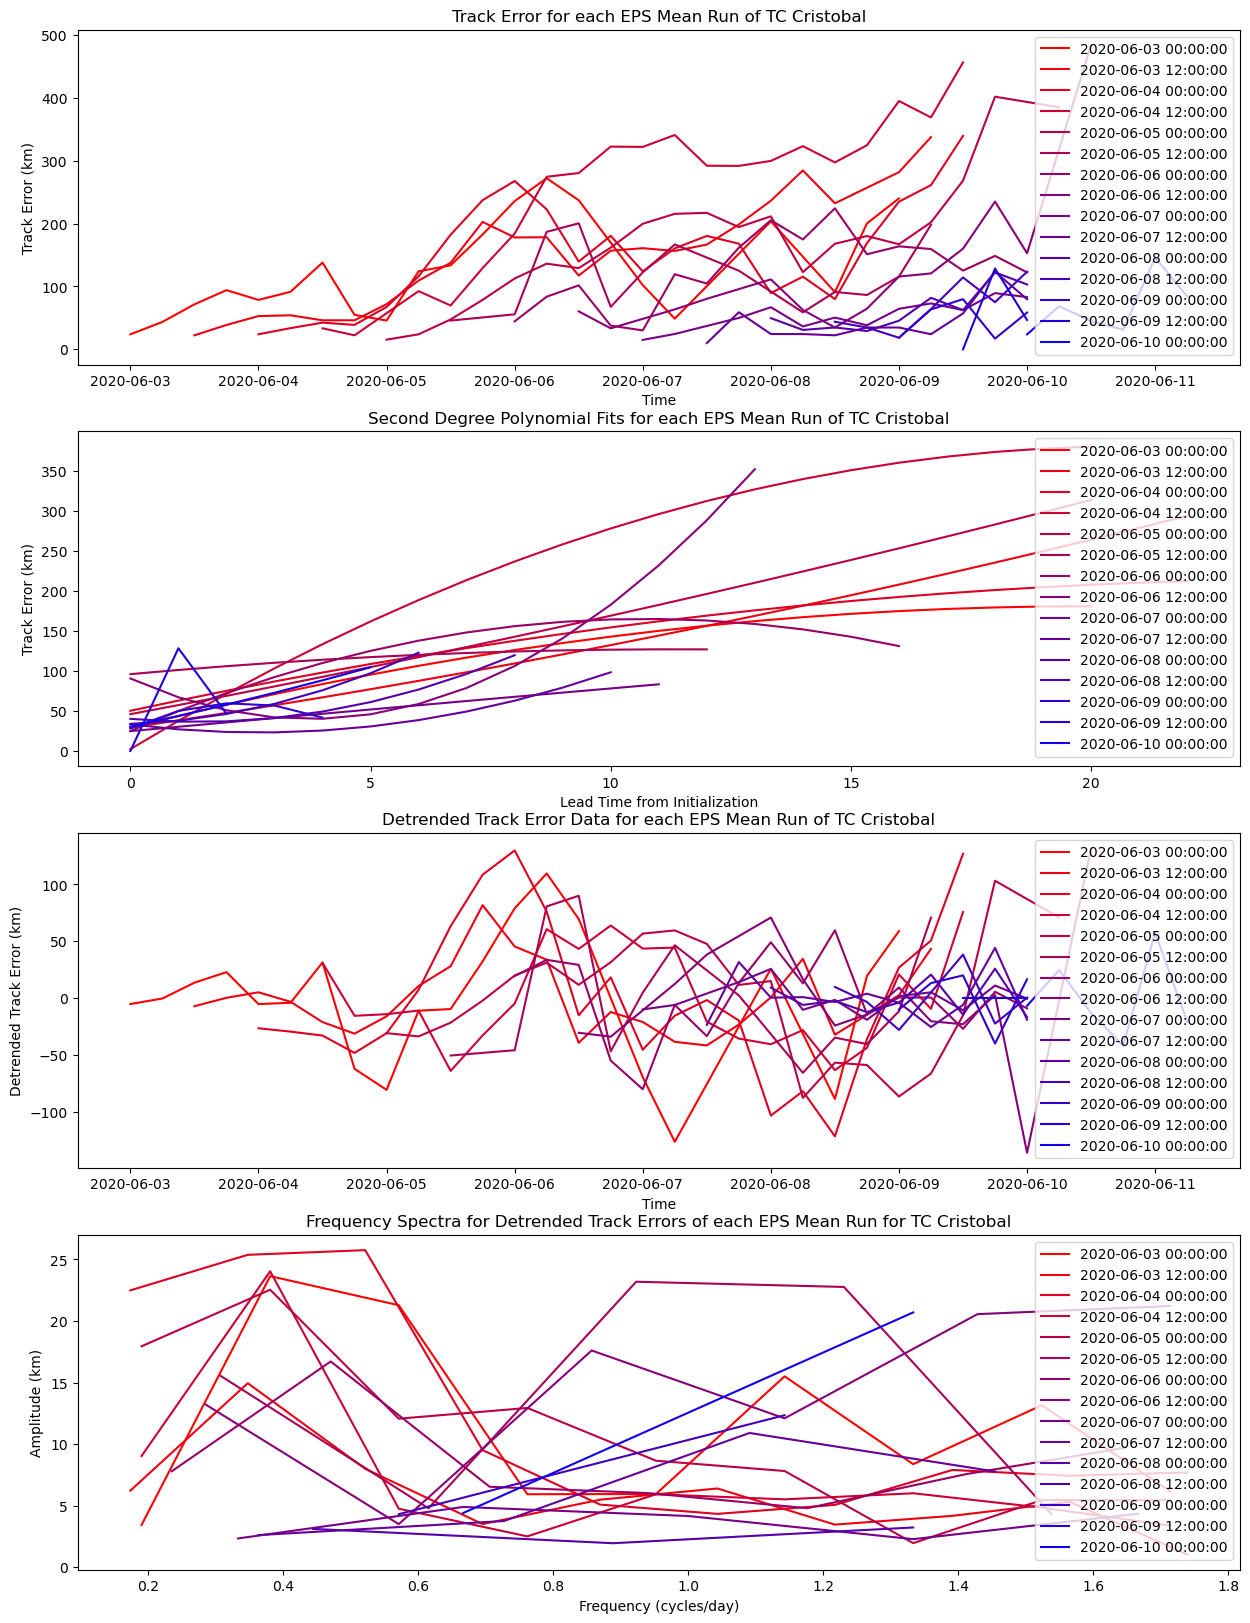

In [349]:
#Create array of model run numbers to iterate through each and plot them.
RunNumber = np.arange(0,15,1)
labels = []
for i in RunNumber:
    cf = i/len(RunNumber)
    label = fftplot(i, ax1, ax2, ax3, ax4, cf)
    labels.append(label)
ax1.legend(labels)
ax2.legend(labels)
ax3.legend(labels)
ax4.legend(labels)
fig1 